# EDA Penguins 🗺🧭🐧

## Requerimientos:

In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10,10)

penguin_color = {
    'Adelie':'#a6cee3',
    'Chinstrap':'#1f78b4',
    'Gentoo':'#b2df8a'
}

## Ingesta de datos

Existen tres maneras de consumir la info.

1. Por el paquete palmerpenguins

2. A través de la carga de datos del dataset de Seaborn.

3. A través de la interfaz de DeepNote con pandas, read_csv

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

In [ ]:
#Utilizamos el paquete palmerpenguins que incluye deepnote.
raw_penguins_df = palmerpenguins.load_penguins_raw()
#raw_penguins_df.head()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [ ]:
penguins_df = palmerpenguins.load_penguins() #preprocessed
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [ ]:
(
    penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
penguins_df.shape

(344, 8)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [ ]:
(
    penguins_df
    .isnull()
    #.any()
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
(
    penguins_df
    .isna() #in this case, the same as isnull()
    .sum()
    .sort_values(ascending=True)
)

species               0
island                0
year                  0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
(
    penguins_df
    .isna()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

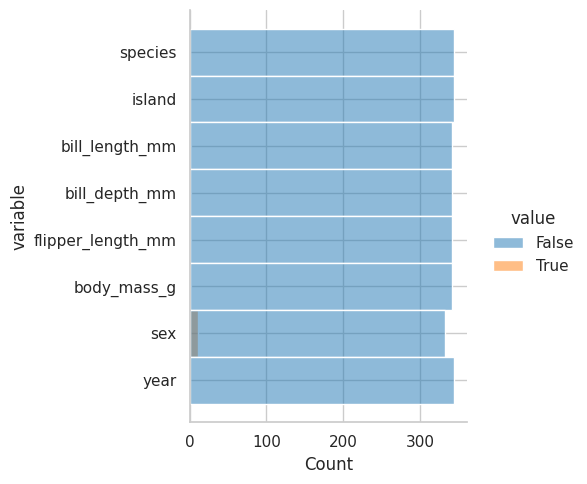

In [ ]:
(
    penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                df,
                y='variable',
                hue='value',
                
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [ ]:
(
    penguins_df
    .isnull()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

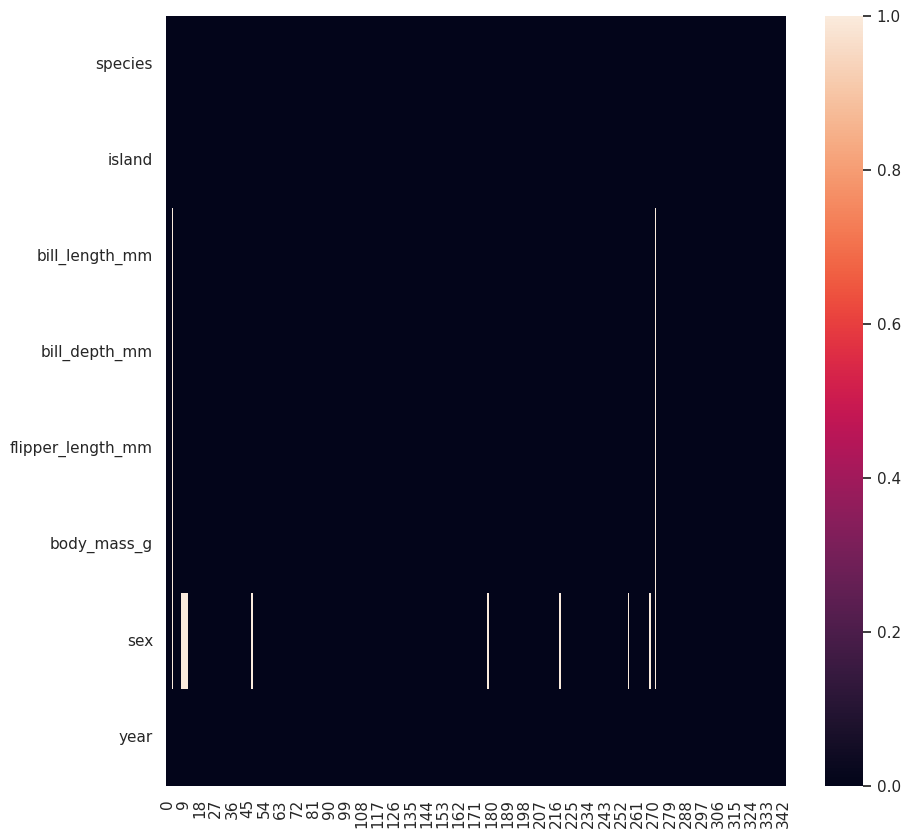

In [ ]:
(
    penguins_df
    .isnull()
    .transpose()
    .pipe( 
        lambda df:(
            sns.heatmap(
            data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos datos faltantes?

In [ ]:
copy_df = penguins_df.copy()
(
    copy_df
    .dropna()
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
# Codigo añadido posteriormente al realizar todos los análisis y modelos
# Procedemos con la eliminación de los valores NaN por la facilidad al ajustar la evaluación de resultados
# de los distintos modelos. Y porque los mismos no representan gran porcentaje.
penguins_df.dropna(inplace=True)

## Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

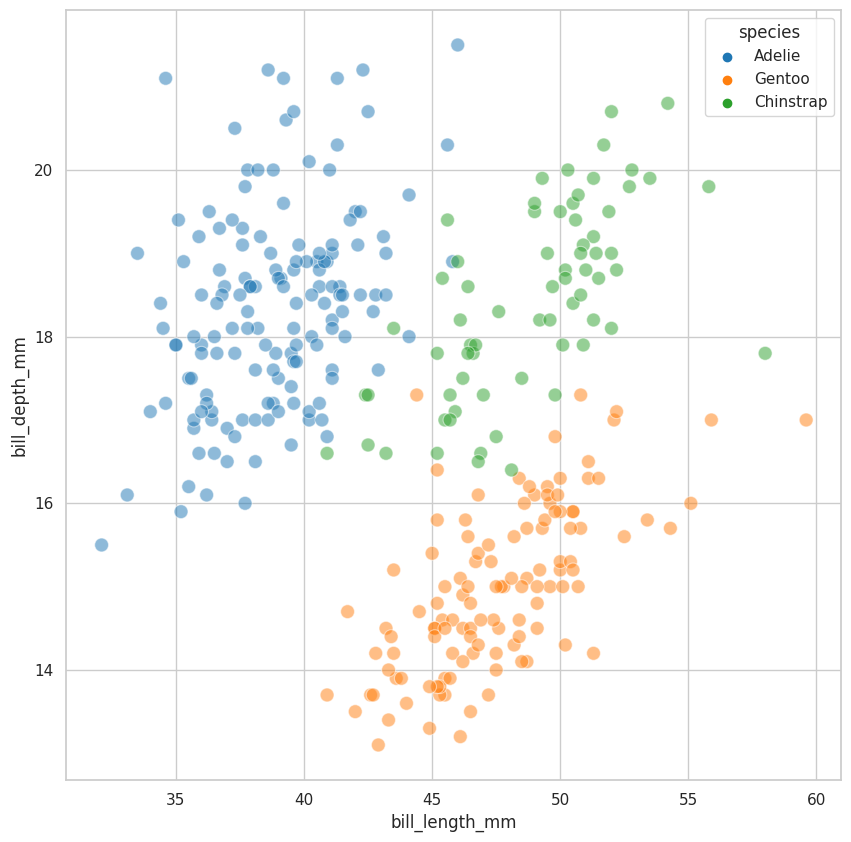

In [ ]:
sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    alpha=1/2,
    s=100
)

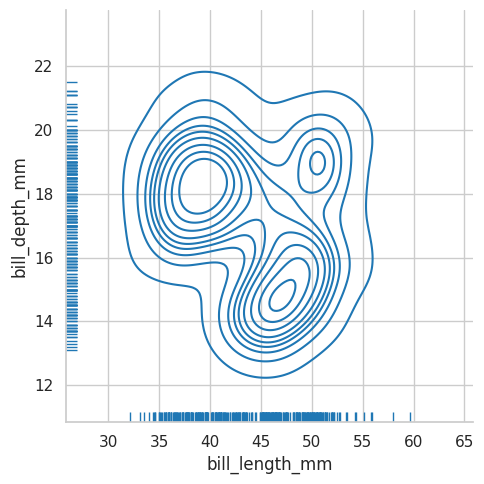

In [ ]:
sns.displot(
    data=penguins_df,
    kind='kde',
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

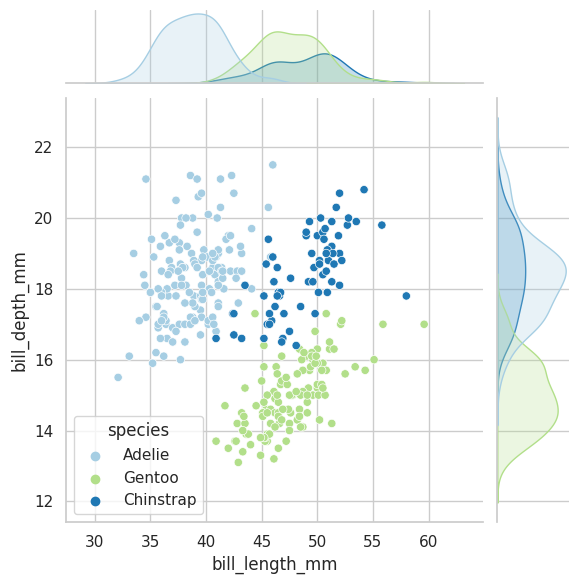

In [ ]:
sns.jointplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    palette=penguin_color,
    hue='species'
)

## Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

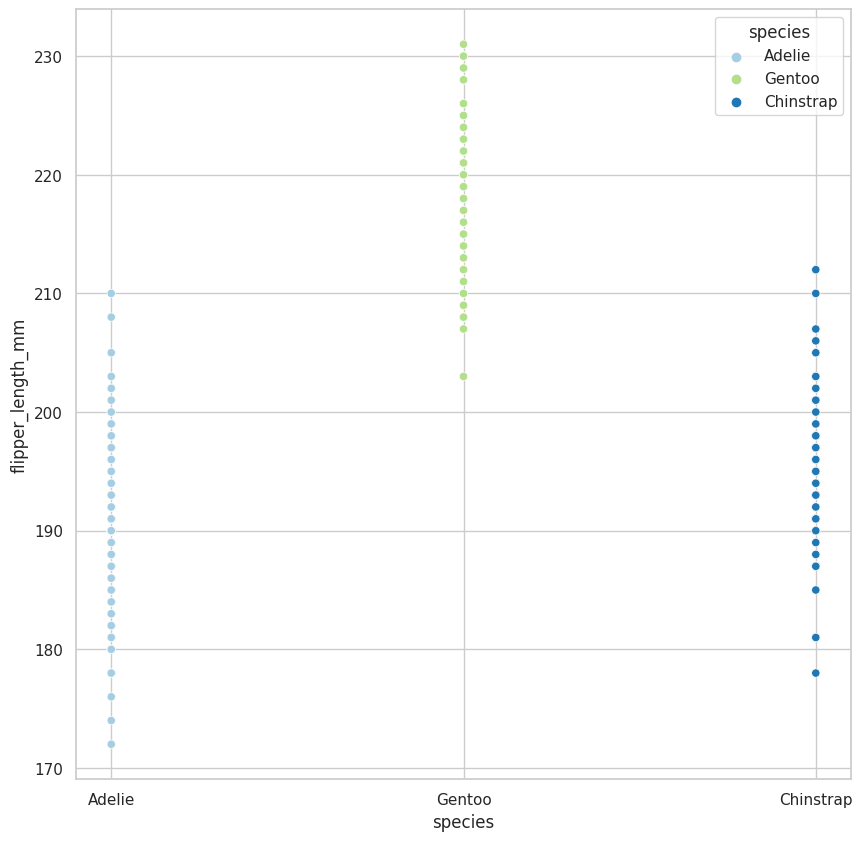

In [ ]:
sns.scatterplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

/tmp/ipykernel_85/2605931113.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

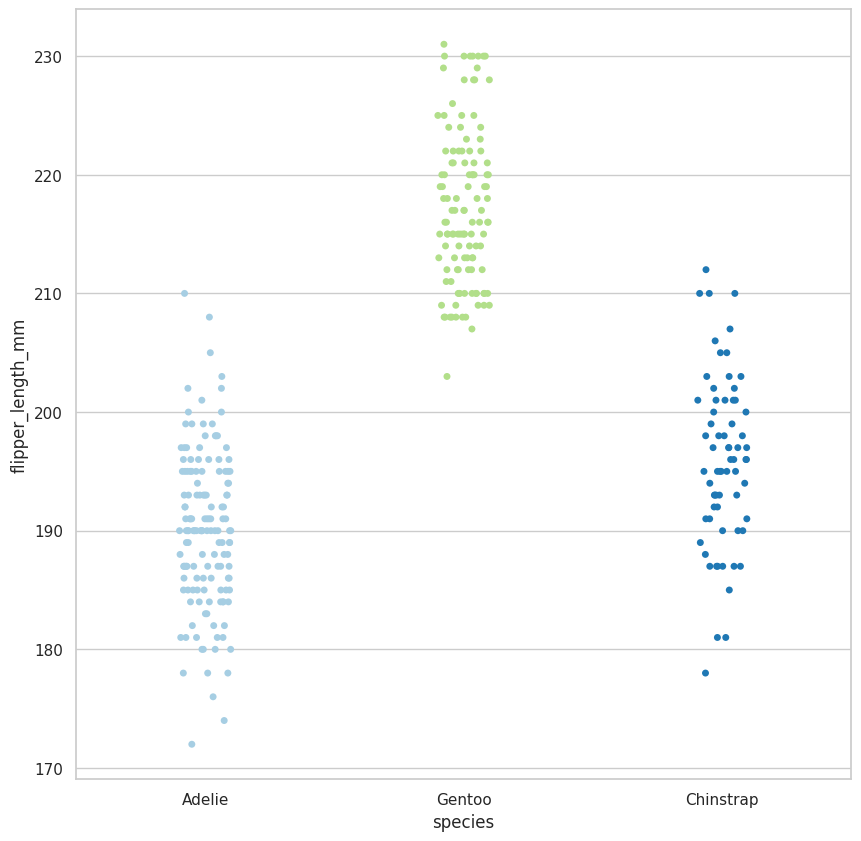

In [ ]:
sns.stripplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

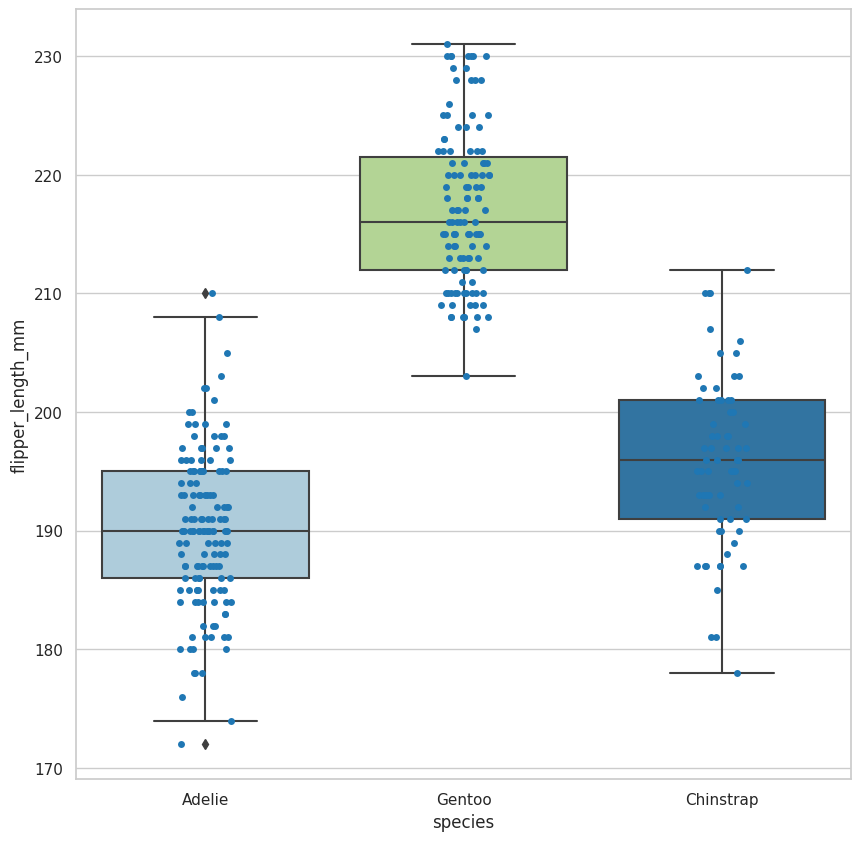

In [ ]:
ax = sns.boxplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

ax = sns.stripplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm'
)

/tmp/ipykernel_85/643718247.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


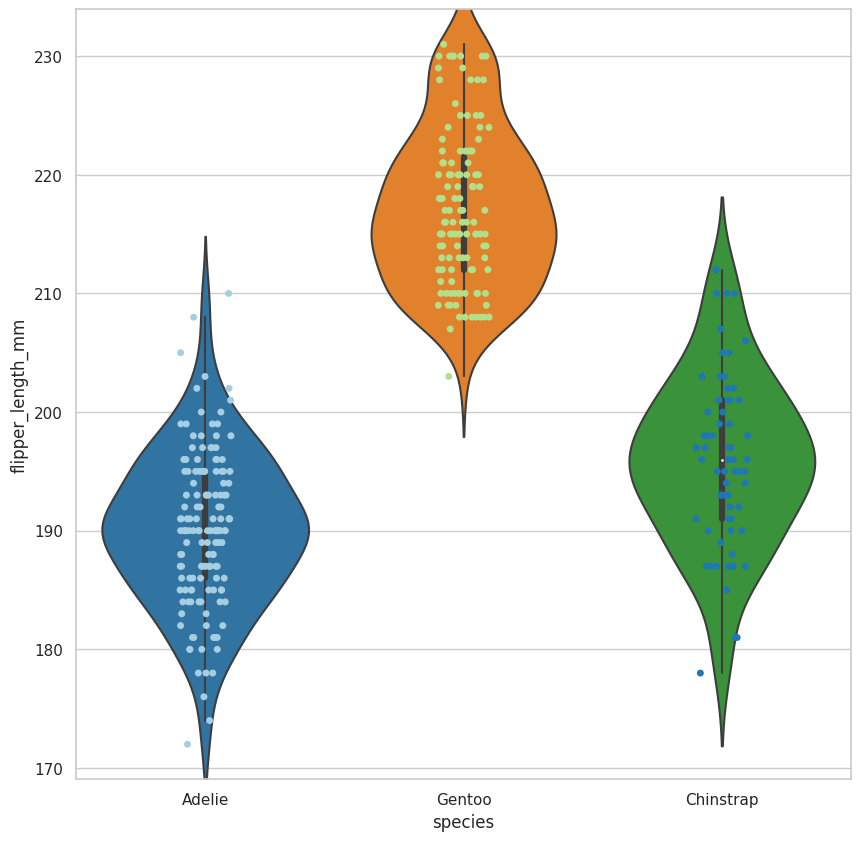

In [ ]:
ax = sns.violinplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm'
)

ax = sns.stripplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

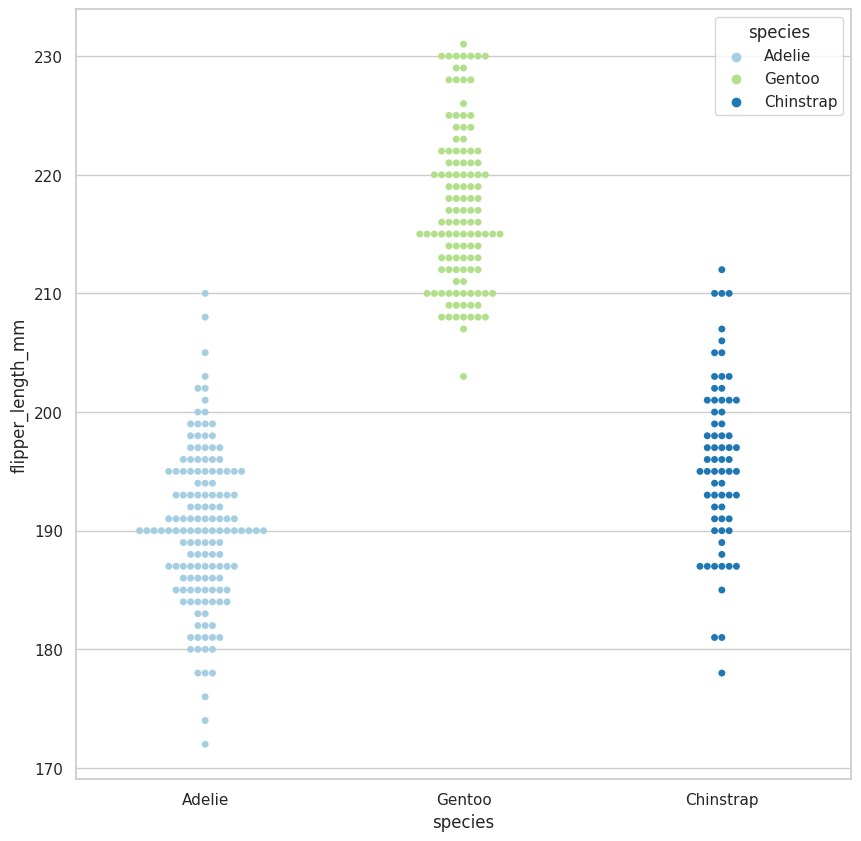

In [ ]:
sns.swarmplot(
    data=penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

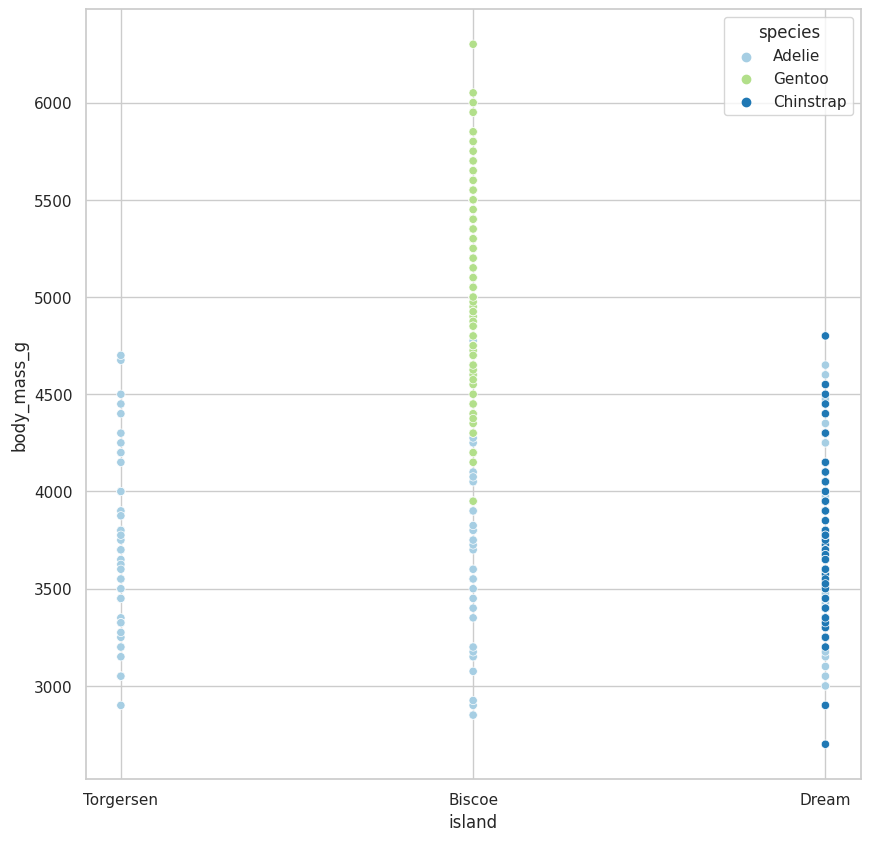

In [ ]:
sns.scatterplot(
    data=penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color
)

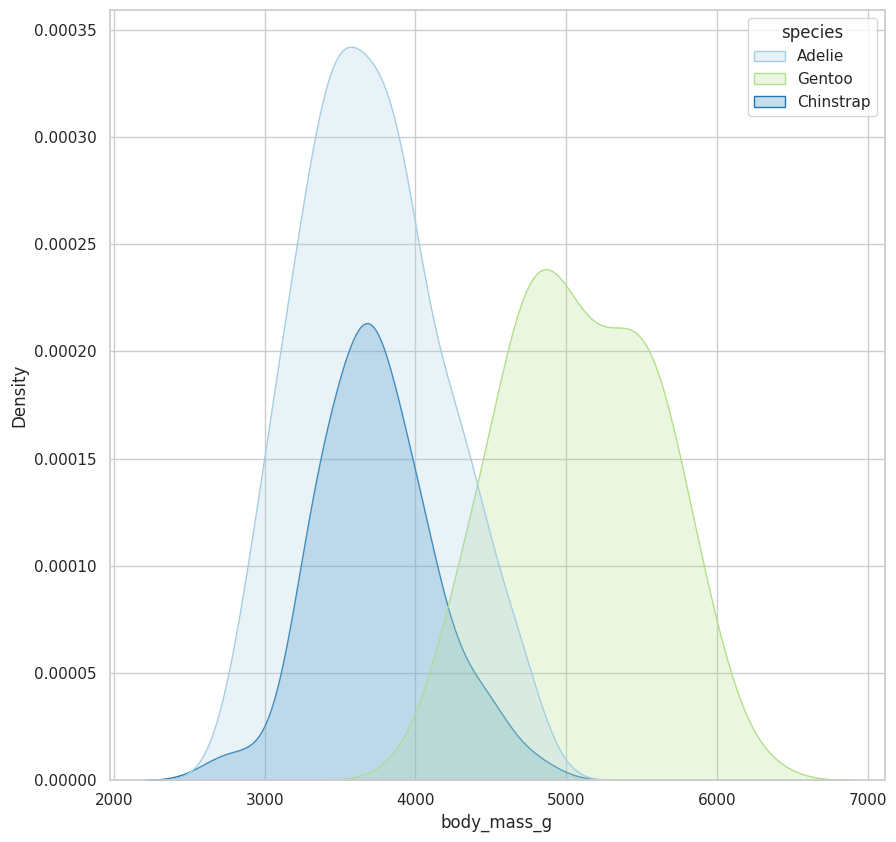

In [ ]:
ax = sns.kdeplot(
    data=penguins_df,
    x='body_mass_g',
    hue='species',
    palette=penguin_color,
    fill=True
)

# Matrices de Correlación

## ¿Existe una correlación LINEAL entre alguna de las variables?

In [ ]:
penguins_correlations = penguins_df.corr().round(4)
penguins_correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.0000,-0.2286,0.6531,0.5895,0.0327
bill_depth_mm,-0.2286,1.0000,-0.5778,-0.4720,-0.0482
flipper_length_mm,0.6531,-0.5778,1.0000,0.8730,0.1511
body_mass_g,0.5895,-0.4720,0.8730,1.0000,0.0219
year,0.0327,-0.0482,0.1511,0.0219,1.0000


<AxesSubplot: >

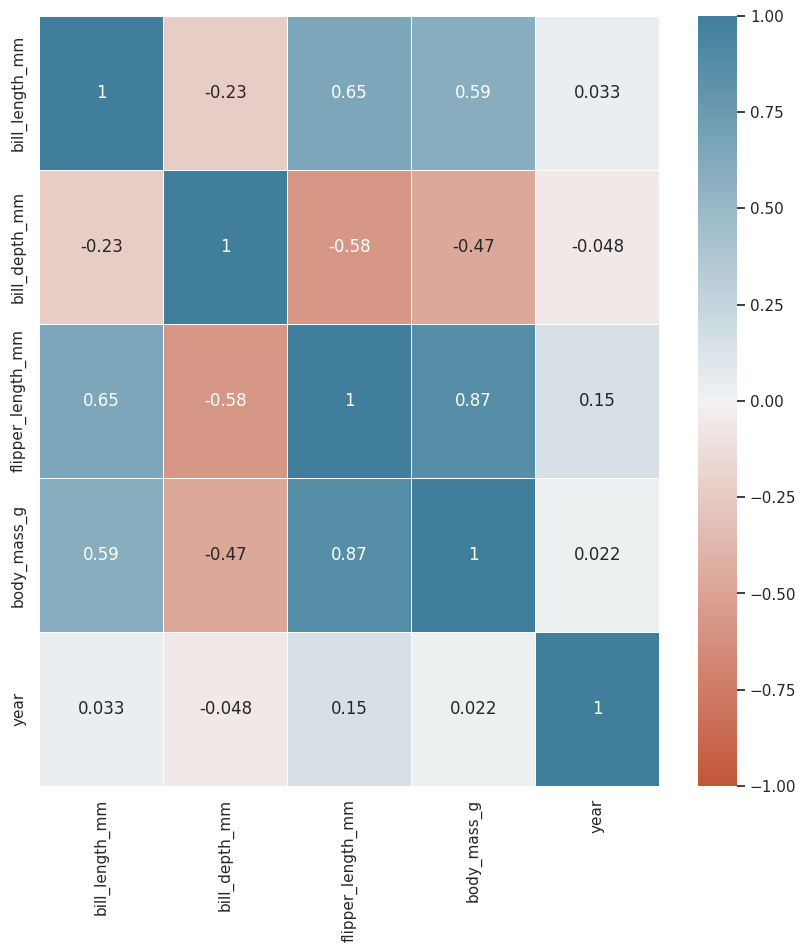

In [ ]:
sns.heatmap(
    data=penguins_correlations,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

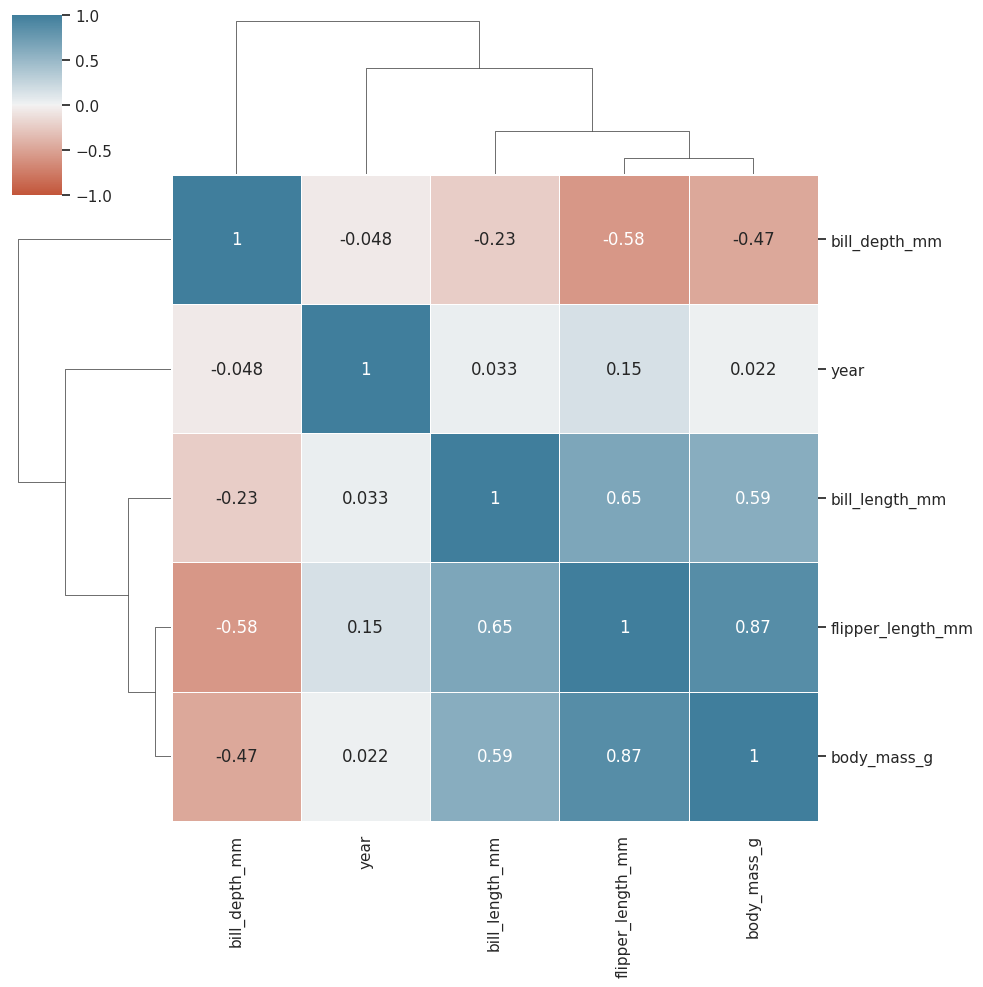

In [ ]:
sns.clustermap(
    data=penguins_correlations,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cómo representar una variable categórica con una variable numérica discreta?

In [ ]:
penguins_df = (
    penguins_df
    .assign(
        numeric_sex=lambda s: s.sex.replace(['female','male'],[1,0])
    )
)

## ¿Cuáles son algunas limitantes de los coeficientes de correlación lineal?

### Solo nos.

[[1.00000000e+00 3.12050847e-16]
 [3.12050847e-16 1.00000000e+00]]
[[1.         0.91657625]
 [0.91657625 1.        ]]


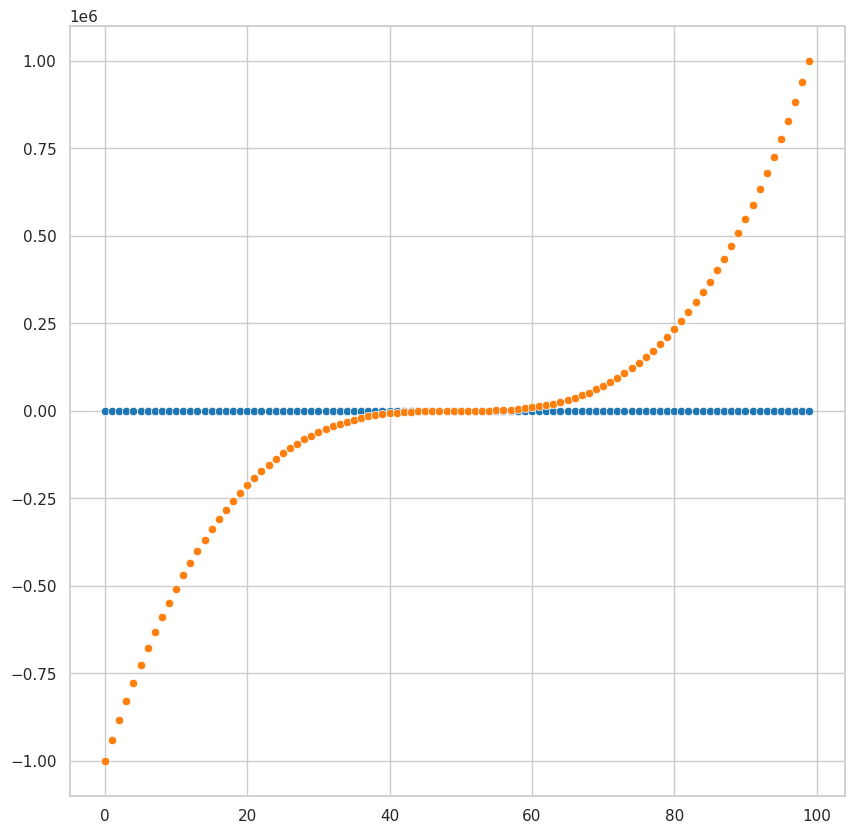

In [ ]:
x = np.linspace(-100,100,100)
y = x**2
z = x**3

#print(x) # matriz original linspace
#print(y) # matriz de x elevado al cuadrado | par
#print(z) # matriz de z elevado al cubo | impar

#y += np.random.normal(0,1000, x.size) # ruido
#z += np.random.normal(0,1000, x.size)

print(np.corrcoef(x,y)) # no tienen una correlación lineal, sin embargo sabemos que existe una relación cuadratica
print(np.corrcoef(x,z)) # no tienen una relación lineal alta, sin embargo sabemos que tienen una relación cúbica

ax = sns.scatterplot(x)
#ax = sns.scatterplot(y)
ax = sns.scatterplot(z)

<AxesSubplot: xlabel='bill_length_mm', ylabel='body_mass_g'>

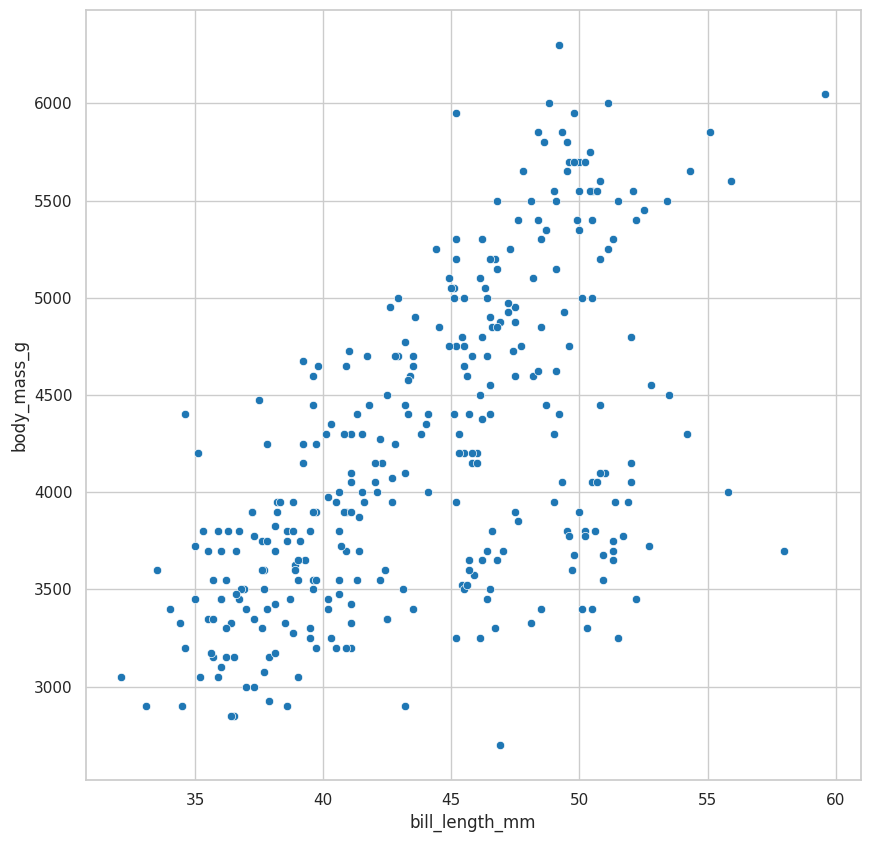

In [ ]:
sns.scatterplot(
    penguins_df,
    x='bill_length_mm',
    y='body_mass_g'
)

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


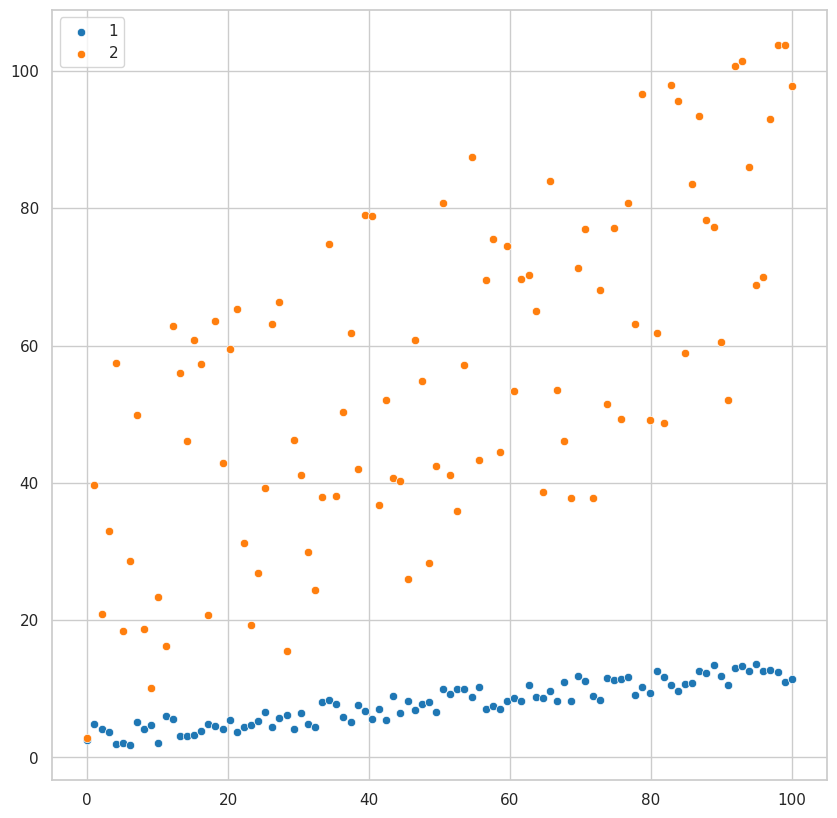

In [ ]:
np.random.seed(42)

x_1 = np.linspace(0,100,100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2,2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)
x_2 = np.linspace(0,100,100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0,60,size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1','2'])

print(np.corrcoef(x_1,y_1))
print(np.corrcoef(x_2,y_2))

## Estableciendo relaciones: Análisis de regresión simple

In [ ]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


[  0. 100.] [ 2.83973833 12.92170761]
[  0. 100.] [28.51986127 83.21994551]


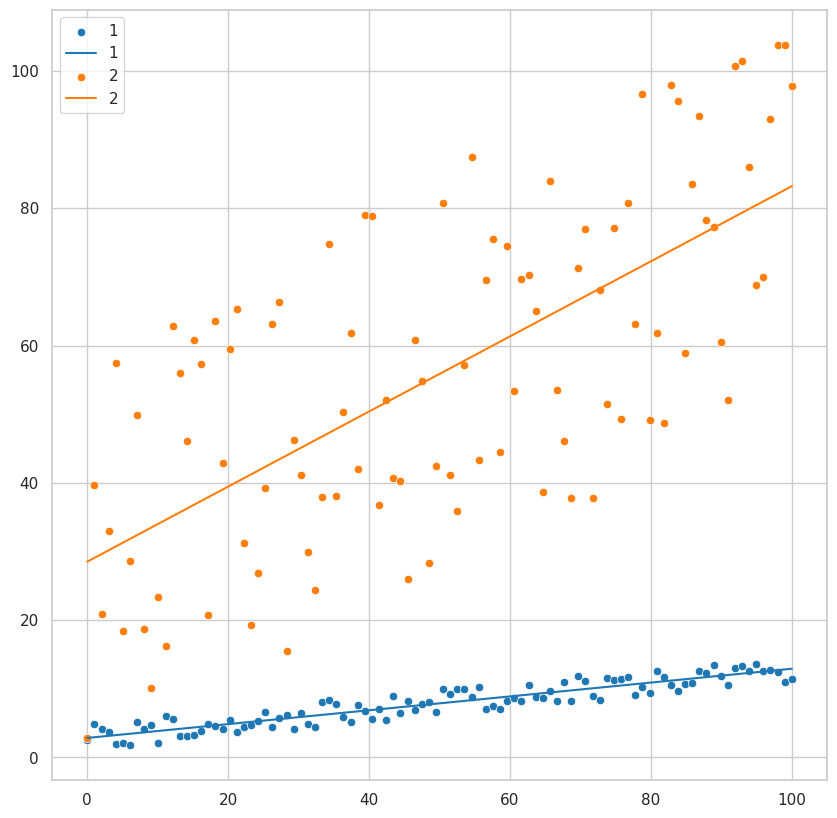

In [ ]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1
print(fx_1, fy_1)

plt.plot(fx_1,fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope * fx_1
print(fx_2, fy_2)

plt.plot(fx_2,fy_2)

plt.legend(labels=['1','1','2','2'])


In [ ]:
#penguins_df.bill_length_mm.fillna(0, inplace=True)
#penguins_df.bill_depth_mm.fillna(0, inplace=True)

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


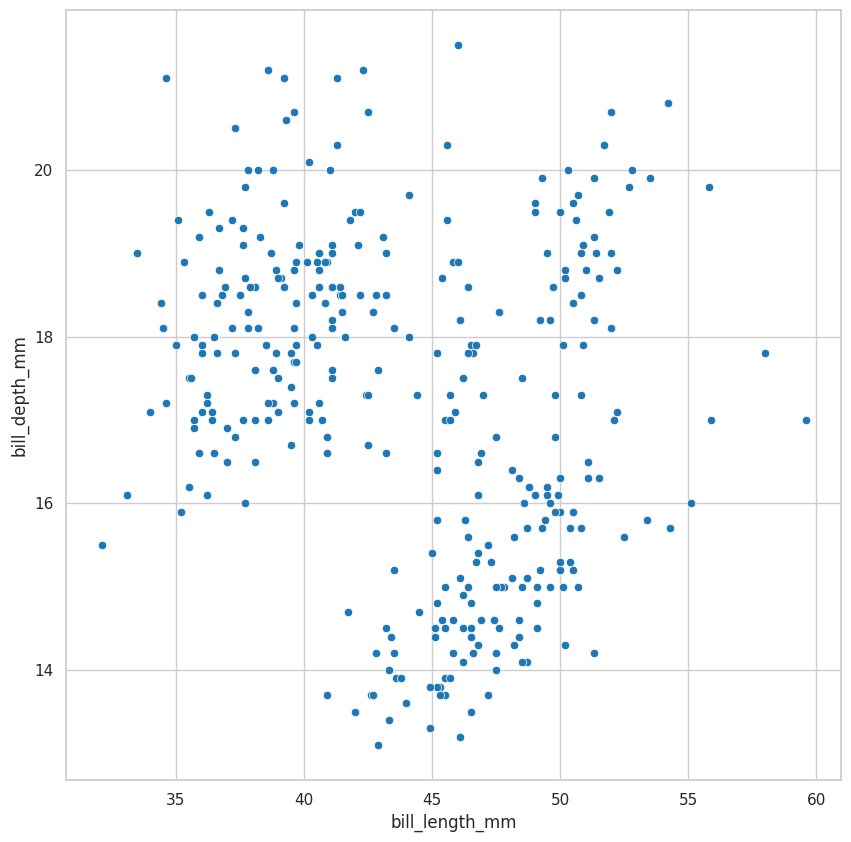

In [ ]:
sns.scatterplot(
    penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    #hue='species'
)

res_penguins = scipy.stats.linregress(
    x = penguins_df.bill_length_mm, 
    y = penguins_df.bill_depth_mm
)

print(res_penguins)

# fx = np.array([penguins_df.bill_length_mm.min(), penguins_df.bill_depth_mm.max()])
# fy = res_penguins.intercept + res_penguins.slope * fx
# print(fx, fy)
# plt.plot(fx, fy)

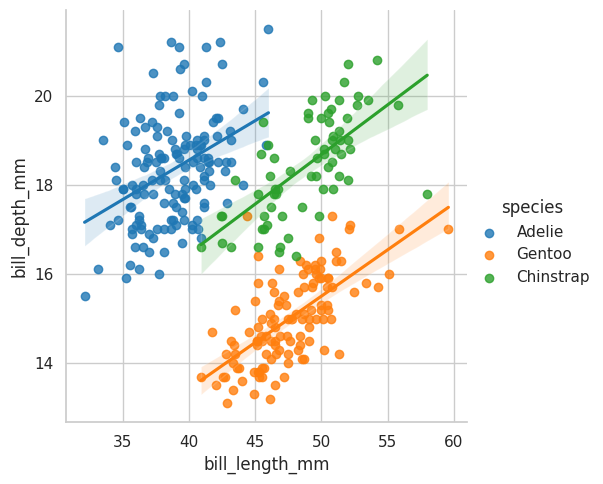

In [ ]:
sns.lmplot(
    penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)



Limitantes de la Regresión Lineal Simple

1. 

In [ ]:
penguins_df.bill_length_mm.isna().value_counts()
penguins_df.sex.isna().value_counts()

False    333
Name: sex, dtype: int64

In [ ]:
penguins_df.fillna(0)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,1
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


## Análisis de regresión múltiple

Olvidé mi báscula para pesar a los pinguinos, ¿Cuál sería la mejor forma de capturar ese dato?

Creando modelos

Modelo 1

In [ ]:
model_1 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm', #asociacion de peso con el largor del pico
        data = penguins_df,

    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.54e-32
Time:                        00:27:22   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 2

In [ ]:
model_2 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm', # asociaciones múltiples
        data = penguins_df,

    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           7.04e-46
Time:                        00:27:22   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 3

In [ ]:
model_3 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = penguins_df,

    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          9.26e-103
Time:                        00:27:22   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo 4

In [ ]:
model_4 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)', 
        # se pueden ingresar variables categóricas directamente
        data = penguins_df,

    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          6.28e-122
Time:                        00:27:22   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo 5

In [ ]:
model_5 = (
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm + C(sex)', 
        # se pueden ingresar variables categóricas directamente
        data = penguins_df,

    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          3.53e-118
Time:                        00:27:22   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Warning:

Siempre analizar las relaciones de las variables que tratan de predecir la variable objetivo, no debe existir demasiada correlación entre variables explicativas, ahora bien, en caso de que una variable explicativa esté muy relacionada a la variable objetivo SÍ indica un gran potencial de predictibilidad, lo cual es bueno, como el caso del flipper length y sexo para la predicción del peso de un pinguino.

## Visualizando resultados

### Creación de tabla de resultados

In [ ]:
models_results = pd.DataFrame(
    dict(
        actual_value=penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=penguins_df.species,
        sex=penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


### ECDFs

<AxesSubplot: ylabel='Proportion'>

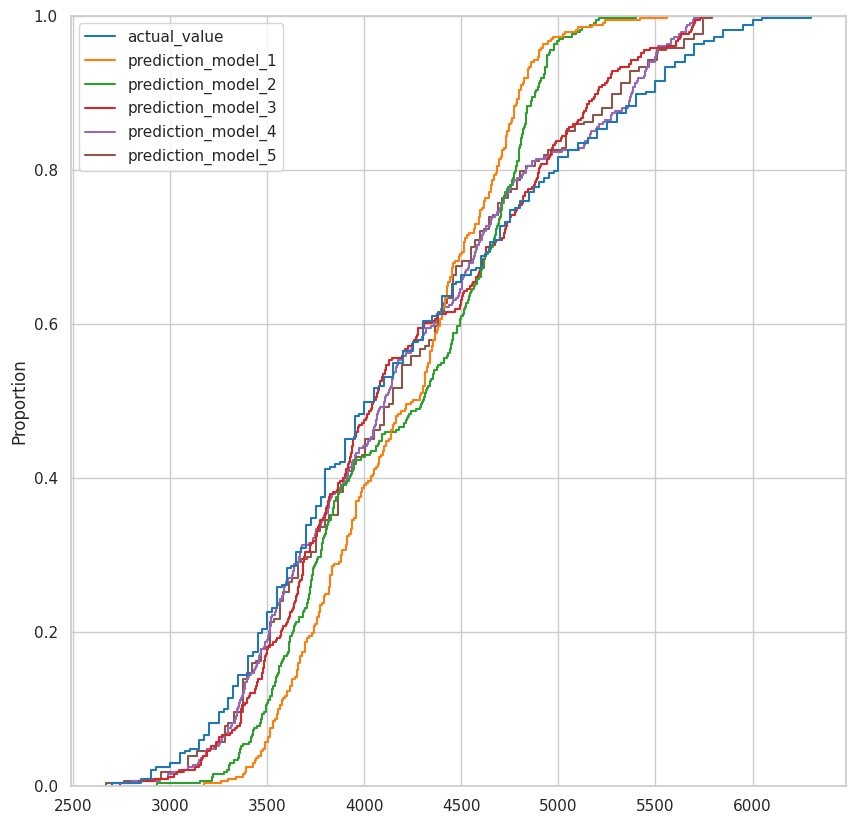

In [ ]:
sns.ecdfplot(
    data=models_results
)

### PDFs

<AxesSubplot: ylabel='Density'>

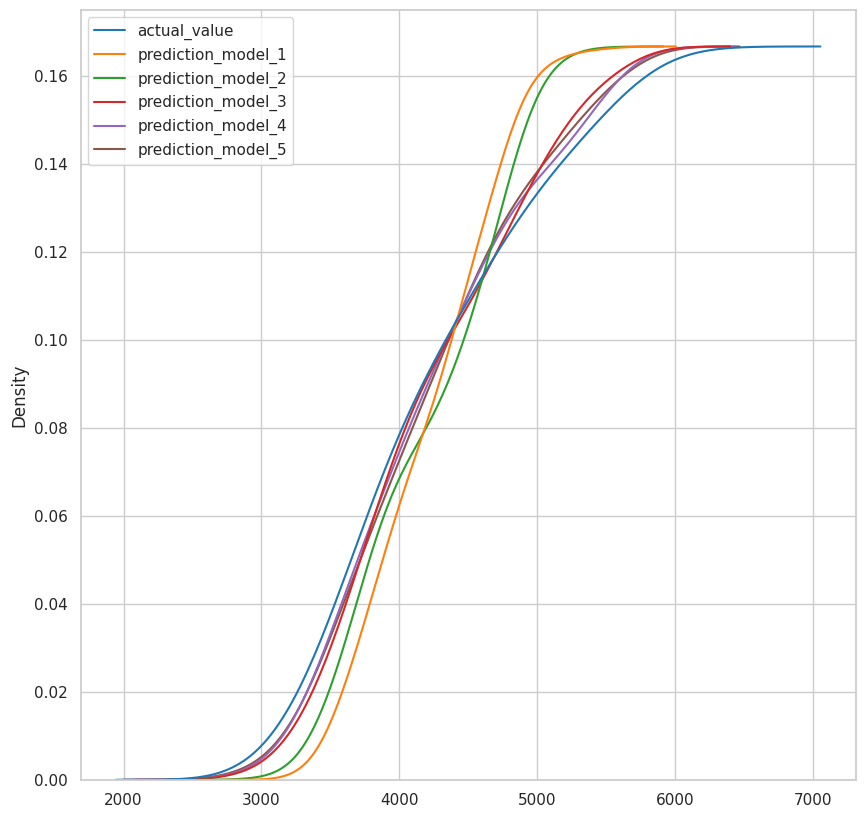

In [ ]:
sns.kdeplot(
    data=models_results,
    cumulative=True
)

### ¿Qué pudimos haber encontrado antes de hacer los modelos?

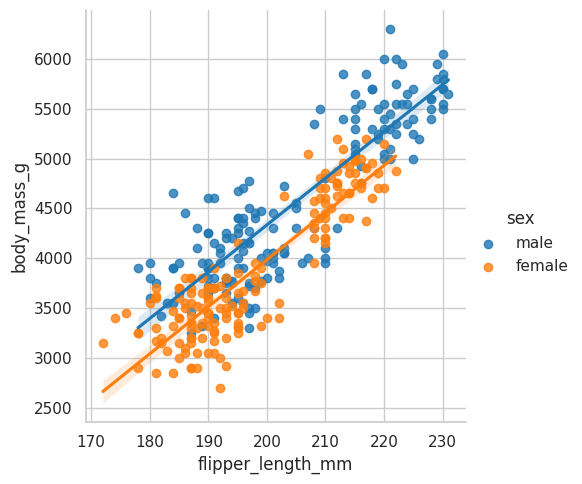

In [ ]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex'
)

Siempre explorar los datos hasta conocerlos muy bien antes de iniciar con los modelos. Comprender la información.

El EDA pudo haber ahorrado muchísimo tiempo para llegar a la conclusión debido a la comprensión de la data.

Siempre visualizar datos.

## Análisis de Regresión Logística

## ¿Podemos crear un modelo que nos ayude a saber cuando un pinguino es macho o hembra?

In [ ]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                  0.4793
Time:                        00:27:26   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61.4464      6.944      8.849      0.000      47.836      75.057
C(island)[T.Dream]         1.5596      0.493      3.163      0.002       0.593       2.526
C(island)[T.Torgersen]     1.0323      0.599      1.725      0.085      -0.141       2.205
flipper_length_mm         -0.1393      0.024     -5.874      0.000      -0.186      -0.093
bill_length_mm            -0.1413      0.045     -3.150      0.002      -0.229      -0.053
bill_depth_mm             -1.6401      0.185     -8.864      0.000      -2.003      -1.277
==========================================================================================
"""

El parámetro que no aparece en una variable categórica es a la cual se está haciendo referencia

## Exploración de nuestras variables categóricas

In [ ]:
(
    penguins_df
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


Los datos no están equilibrados, por ende, el modelo está sesgado y es por eso que el resultado de la probabilidad de que existan machos en la isla biscoe era la más alta. Es de suma importancia explorar y comprender los datos antes de construir los modelos propiamente.

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

In [ ]:
# Tipos de especies
penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
# Remplazamos las variables categóricas por valores numéricos
penguins_df = (
    penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie','Gentoo','Chinstrap'], [1,0,0]))
)

penguins_df[['species','is_adelie']].value_counts()

species    is_adelie
Adelie     1            146
Gentoo     0            119
Chinstrap  0             68
dtype: int64

In [ ]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [ ]:
# validacion
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = penguins_df.is_adelie,
        predicted_value = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions.head()

,actual_adelie,predicted_value
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0


In [ ]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_value'])
    .reset_index(name='count')
)

,actual_adelie,predicted_value,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


## Matriz de confusión

In [ ]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_value
    )   
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_value
)

[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

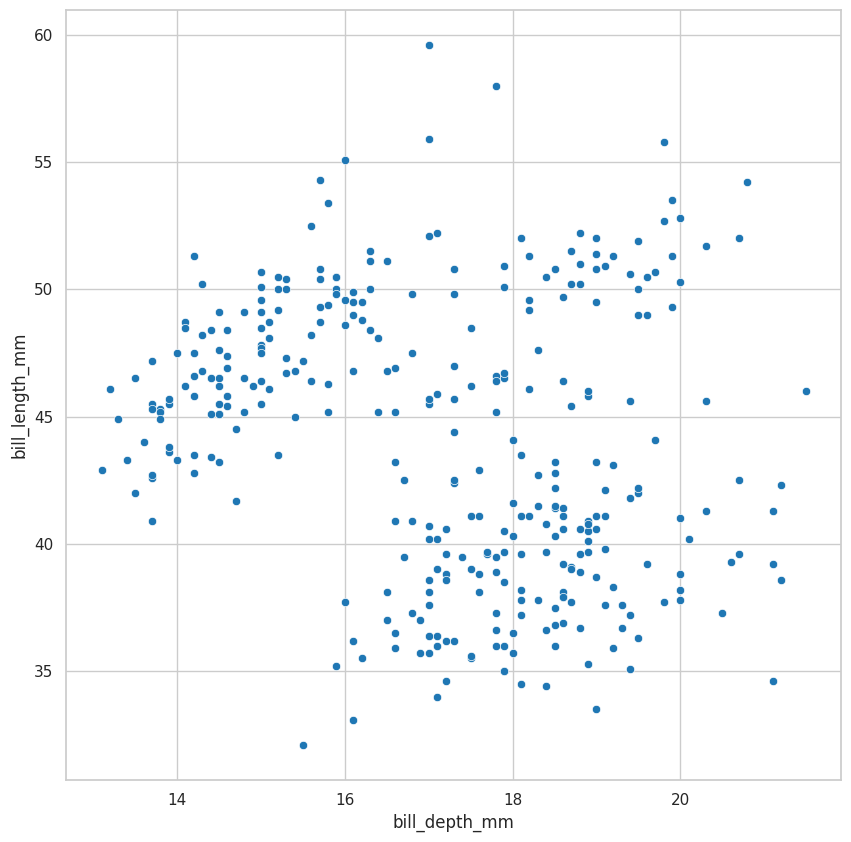

In [ ]:
sns.scatterplot(
    data=penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm'
)

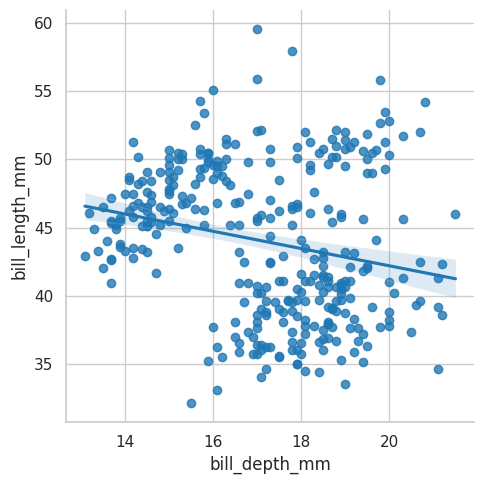

In [ ]:
sns.lmplot(
    data=penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm'
)

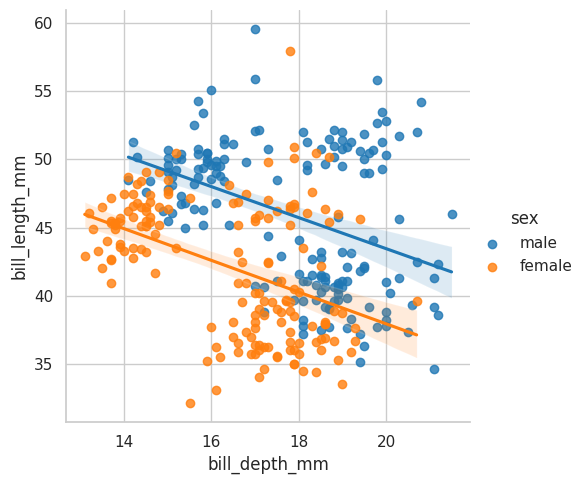

In [ ]:
sns.lmplot(
    data=penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='sex'
)

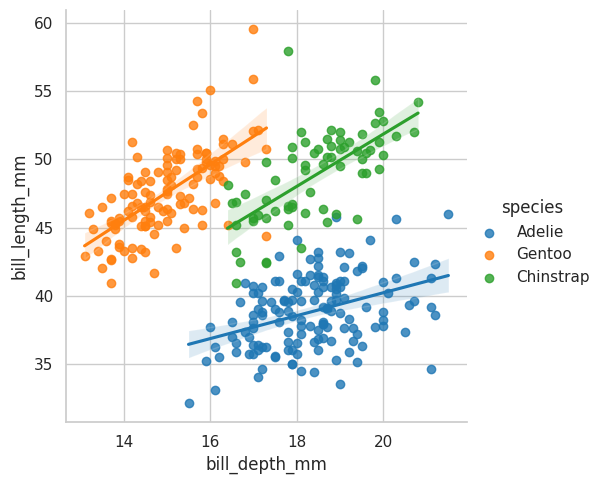

In [ ]:
sns.lmplot(
    data=penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='species'
)

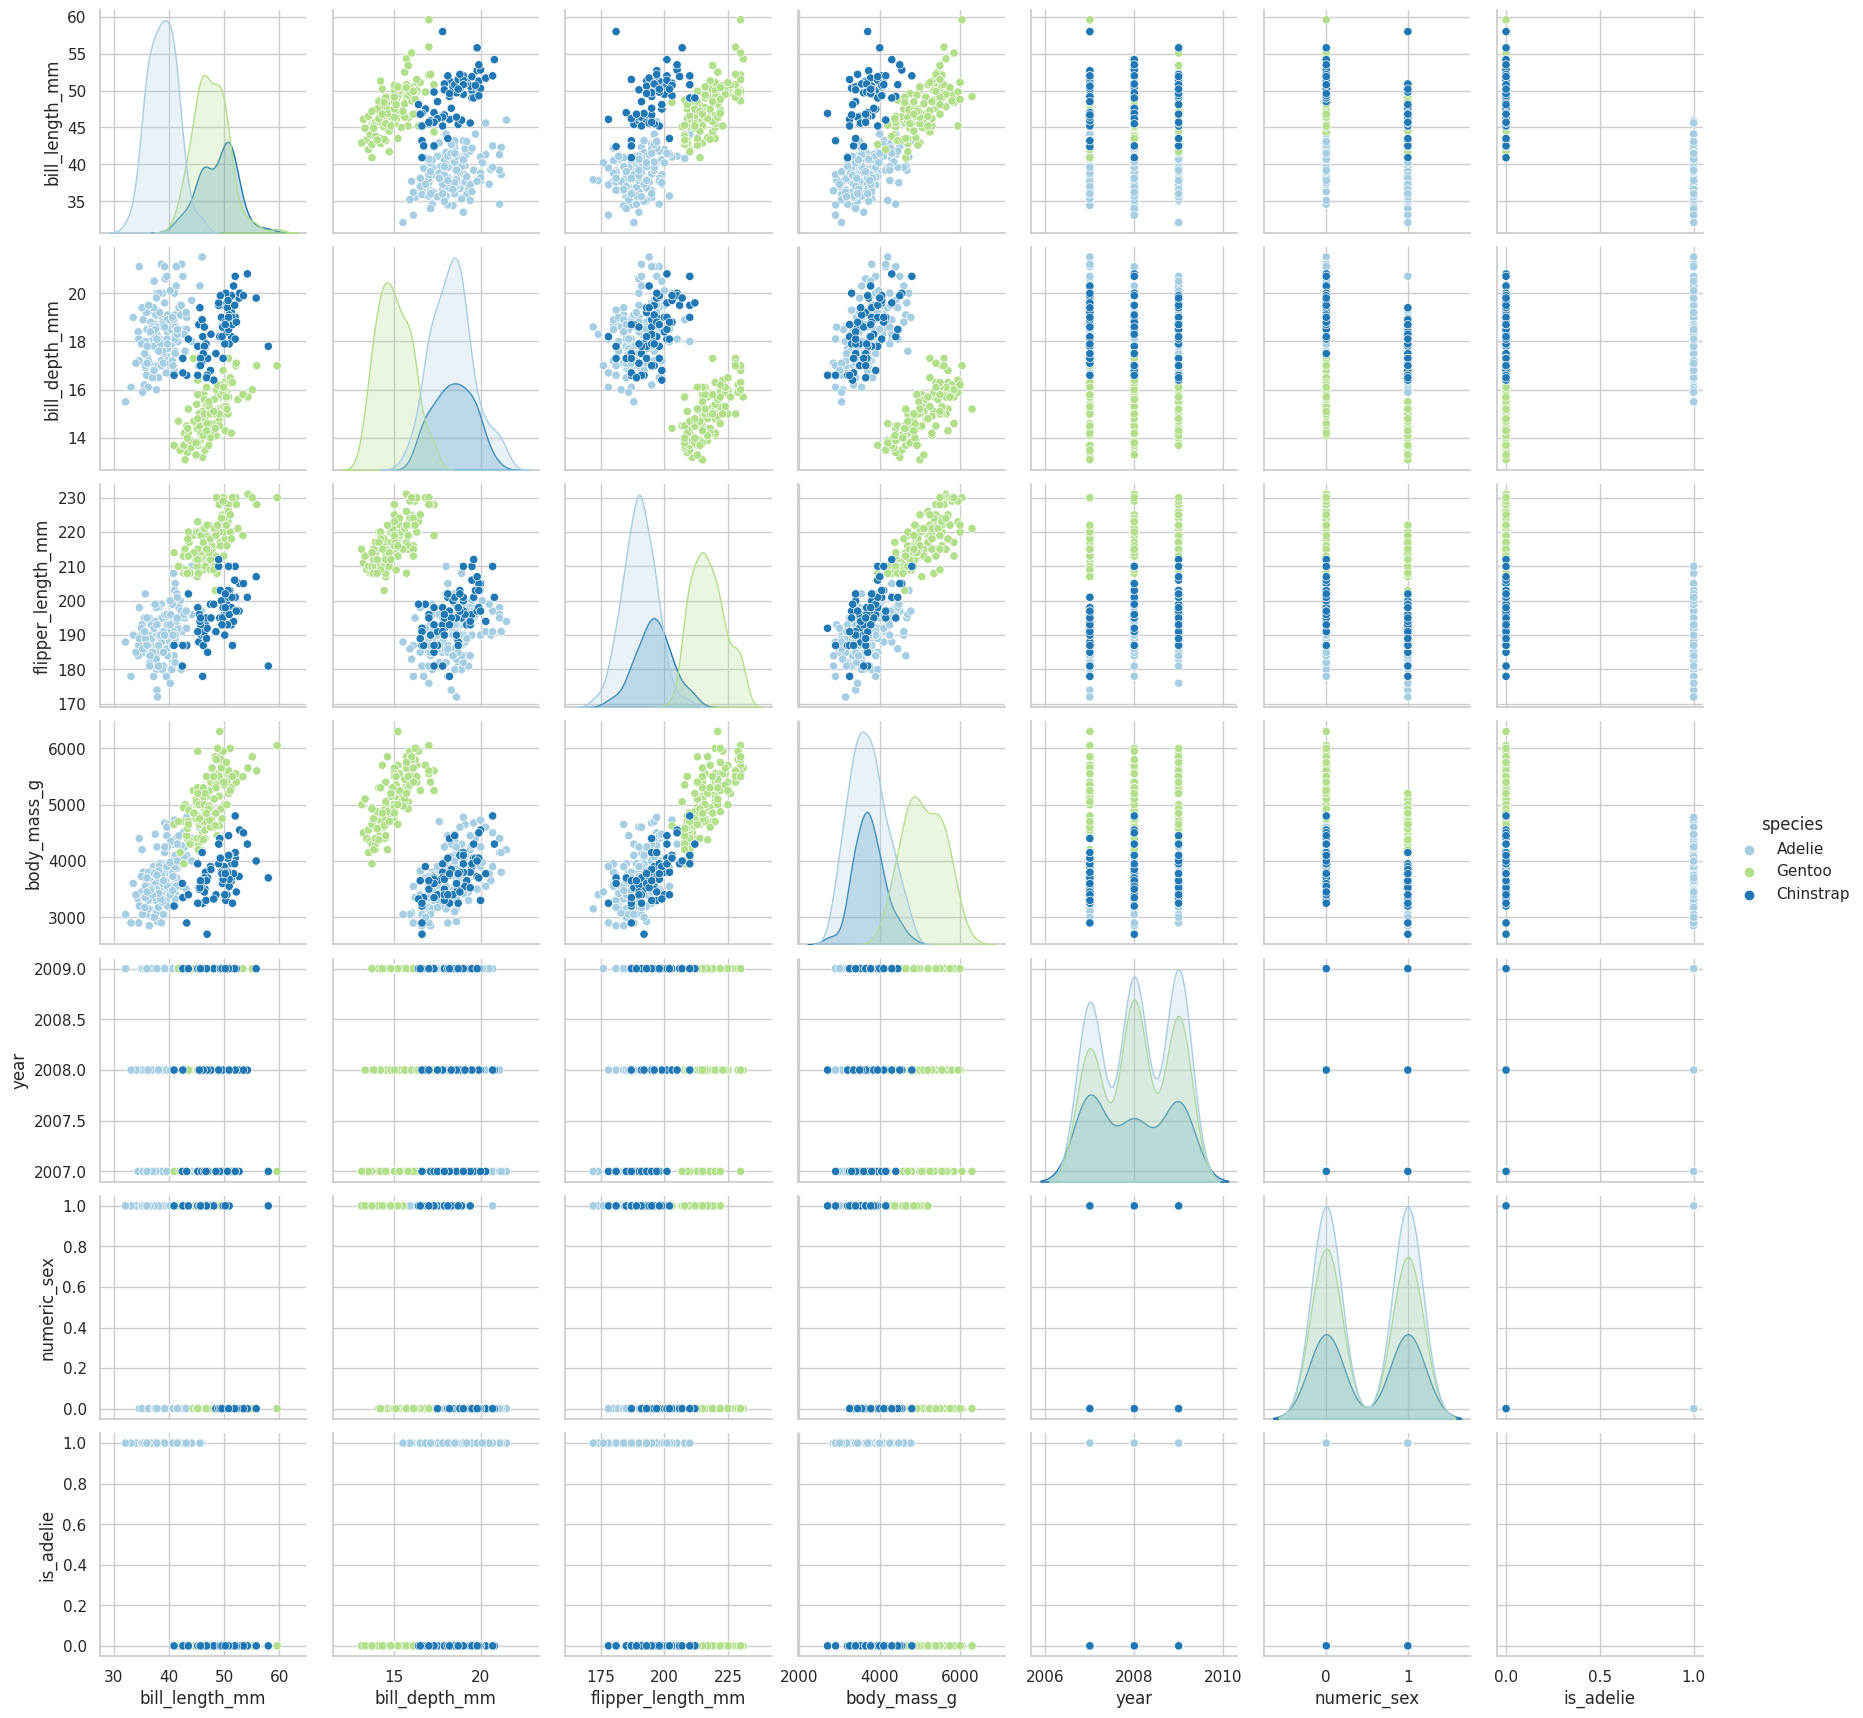

In [ ]:
sns.pairplot(
    data=penguins_df,
    hue='species',
    palette=penguin_color
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d6d22e0-1a39-4033-9c0b-5100459960b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>